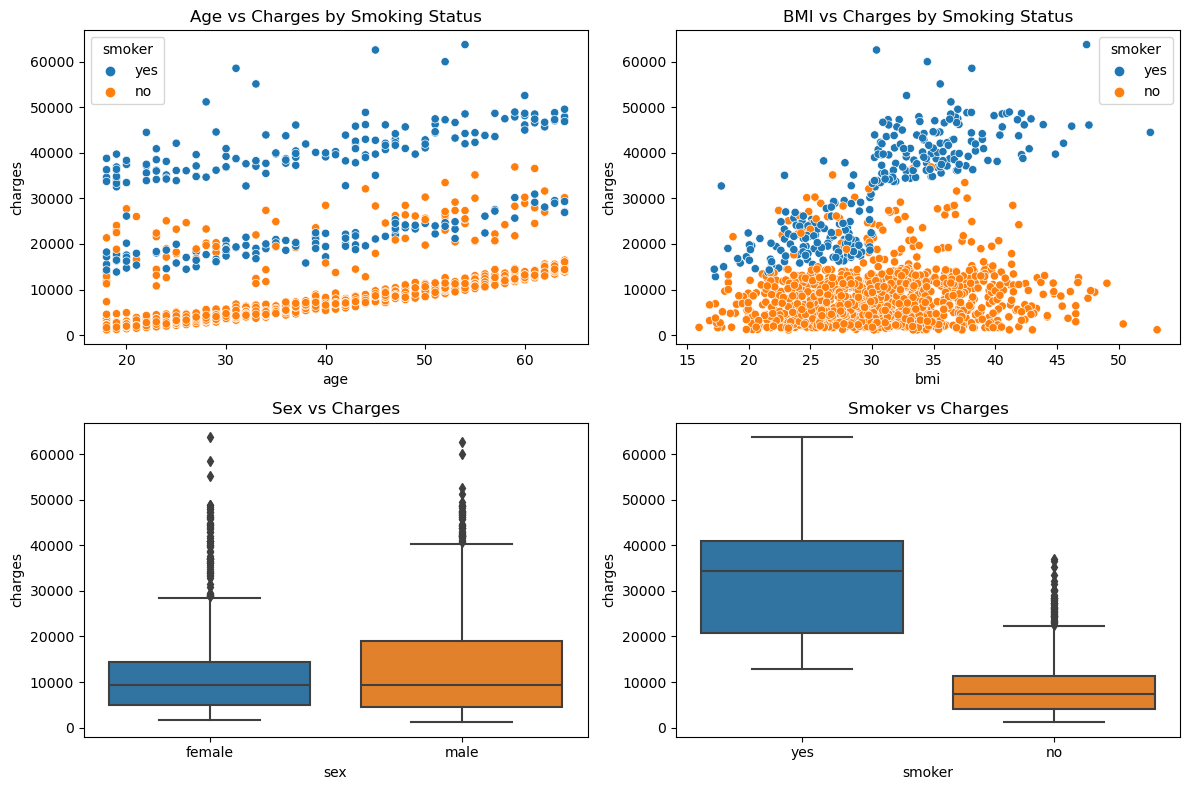

Predicted Insurance Charge: ₹6706.99


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv("insurance.csv")

# ---- Step 1: Visual Analysis ----
plt.figure(figsize=(12, 8))

# Age vs Charges
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Age vs Charges by Smoking Status')

# BMI vs Charges
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs Charges by Smoking Status')

# Sex vs Charges
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='sex', y='charges')
plt.title('Sex vs Charges')

# Smoker vs Charges
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Smoker vs Charges')

plt.tight_layout()
plt.show()

# ---- Step 2: Predicting Charges for Given Input ----

# Define features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Categorical and numeric features
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']

# Pipeline: One-hot encode categoricals + Linear Regression
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X, y)

# Input sample
sample = pd.DataFrame([{
    'age': 28,
    'sex': 'male',
    'bmi': 33.0,
    'children': 3,
    'smoker': 'no',
    'region': 'southeast'
}])

# Predict
predicted_charge = model.predict(sample)[0]
print(f"Predicted Insurance Charge: ₹{predicted_charge:.2f}")
